In [126]:
import numpy as np 
import pandas as pd

In [127]:
data_info = pd.read_excel('./../data/multi_asset_etf_data.xlsx')
data_returns = pd.read_excel('./../data/multi_asset_etf_data.xlsx', sheet_name='total returns')
data_portfolio = pd.read_excel('./../data/multi_asset_etf_data.xlsx', sheet_name='portfolio returns')

In [128]:
data_portfolio.head(), data_returns.head()

(        Date  portfolio
 0 2009-04-30   0.130446
 1 2009-05-31   0.020928
 2 2009-06-30   0.002894
 3 2009-07-31   0.068172
 4 2009-08-31   0.042209,
         Date       SPY       EFA       EEM       PSP       QAI       HYG  \
 0 2009-04-30  0.099346  0.115190  0.155582  0.230203  0.022883  0.138460   
 1 2009-05-31  0.058454  0.131918  0.159400  0.053892  0.027865  0.028555   
 2 2009-06-30 -0.000655 -0.014049 -0.022495  0.045449 -0.003436  0.033517   
 3 2009-07-31  0.074606  0.100415  0.110146  0.143247  0.015326  0.069190   
 4 2009-08-31  0.036940  0.045030 -0.013136  0.033413 -0.004151 -0.016969   
 
         DBC       IYR       IEF       BWX       TIP       SHV  
 0 -0.001000  0.296151 -0.027453  0.008993 -0.017951  0.000553  
 1  0.162663  0.022728 -0.020773  0.053672  0.019966 -0.000472  
 2 -0.026259 -0.024863 -0.005571  0.005148  0.001981  0.000599  
 3  0.018568  0.105799  0.008317  0.031284  0.000879 -0.000027  
 4 -0.040365  0.131939  0.007635  0.007628  0.008413  0.0004

In [129]:
combined_data = pd.merge(data_portfolio, data_returns, on = 'Date')
combined_data.head()

,Date,portfolio,SPY,EFA,EEM,PSP,QAI,HYG,DBC,IYR,IEF,BWX,TIP,SHV
0,2009-04-30,0.130446,0.099346,0.115190,0.155582,0.230203,0.022883,0.138460,-0.001000,0.296151,-0.027453,0.008993,-0.017951,0.000553
1,2009-05-31,0.020928,0.058454,0.131918,0.159400,0.053892,0.027865,0.028555,0.162663,0.022728,-0.020773,0.053672,0.019966,-0.000472
2,2009-06-30,0.002894,-0.000655,-0.014049,-0.022495,0.045449,-0.003436,0.033517,-0.026259,-0.024863,-0.005571,0.005148,0.001981,0.000599
3,2009-07-31,0.068172,0.074606,0.100415,0.110146,0.143247,0.015326,0.069190,0.018568,0.105799,0.008317,0.031284,0.000879,-0.000027
4,2009-08-31,0.042209,0.036940,0.045030,-0.013136,0.033413,-0.004151,-0.016969,-0.040365,0.131939,0.007635,0.007628,0.008413,0.000436


In [130]:
# Question 1 

import statsmodels.api as sm

y = combined_data['portfolio']
x = combined_data['SPY']
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              portfolio   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     575.0
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           6.19e-58
Time:                        20:30:28   Log-Likelihood:                 499.84
No. Observations:                 182   AIC:                            -995.7
Df Residuals:                     180   BIC:                            -989.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0016      0.001     -1.347      0.180      -0.004       0.001
SPY            0.6525      0.027     23.979      0.000       0.599       0.706
==============================================================================
Omnibus:                       15.927   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.143
Skew:                           0.473   Prob(JB):                     2.10e-06
Kurtosis:                       4.597   Cond. No.                         23.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

alpha = -0.0016 (16 bps), suggests that portfolio underperforms the S&P500. beta = 0.6526 (65.26%) which means that a 1 unit increase in the S&P500's returns causes a 0.6526 units increase in the portfolio returns. R**2 = 0.762

In [132]:
y = combined_data['portfolio']
x = combined_data[['SPY', 'HYG']]
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
results = model.summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              portfolio   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     454.1
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           7.57e-71
Time:                        20:30:28   Log-Likelihood:                 533.53
No. Observations:                 182   AIC:                            -1061.
Df Residuals:                     179   BIC:                            -1051.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0017      0.001     -1.659      0.099      -0.004       0.000
SPY            0.4048      0.036     11.318      0.000       0.334       0.475
HYG            0.5370      0.060      8.956      0.000       0.419       0.655
==============================================================================
Omnibus:                        2.116   Durbin-Watson:                   2.217
Prob(Omnibus):                  0.347   Jarque-Bera (JB):                1.929
Skew:                           0.252   Prob(JB):                        0.381
Kurtosis:                       3.023   Cond. No.                         69.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

alpha = -0.0017 (17 bps), suggests that portfolio underperforms the S&P500. beta1_SPY = 0.4048, beta2_HYG = 0.5370. R**2 = 0.835. 

HYG exerted a stronger influence on the portfolio's returns relative to the S&P500 index. 

In [134]:
# Question 3 

coefficients = model.params
predicted_values = model.predict(x) # fitted regresion values using the package 
sse = ((predicted_values - y)**2).sum()
mean_true_values = y.mean()
sst = ((y - mean_true_values)**2).sum()
manual_r_square = 1 - sse/sst
round(manual_r_square, 5) 
# r**2 is similar to the one in the regression results 

0.83536

Question 4

SPY beta (univariate) = 0.6525 
SPY beta (multivariate) = 0.4048. 
The reduction in beta suggests that some of the vairance in SPY's returns could actually be explained by the HYG bonds in the multivariate bonds. For instance, there could exist a correlation between both factors where movements in SPY are linked to HYG's movements. 

This also means that a large proportion of observations observed in the first regression which was being attributed to SPY was better explained by HYG. 

In [136]:
x.corr()

,const,SPY,HYG
const,NaN,NaN,NaN
SPY,NaN,1.000000,0.773322
HYG,NaN,0.773322,1.000000


Question 5 

Univariate Regression: involves SPY 
Multivariate Regression: involves SPY + HYG as regressors 

Sample residuals are always uncorrelated to the regressors. Therefore, in the multivariate regression, the residuals will not have a correlation with the regressor HYG, but in the first univaraite regression, since HYG was not a regressor, there might be more substantial correlation with the sample residual. 

In [138]:
# Univariate 
y = combined_data['portfolio']
x = combined_data['SPY']
x = sm.add_constant(x) 
model = sm.OLS(y, x)
results = model.fit()
predicted = results.predict(x) 
residuals_uni = ((y - predicted) ** 2)

# Multivariate
y = combined_data['portfolio']
x = combined_data[['SPY', 'HYG']]
x = sm.add_constant(x) 
model = sm.OLS(y, x)
results = model.fit()
predicted = results.predict(x) 
residuals_multi = ((y - predicted) ** 2)

residuals_uni.corr(x['HYG']), residuals_multi.corr(x['HYG'])

(0.2232910440158597, 0.06980181864838456)

## Section 2 : Decomposing and Replicating

In [140]:
# Question 1

# Uncover the weights
x = combined_data[combined_data.columns[2:]]
x = sm.add_constant(x) 
model = sm.OLS(y, x)
results = model.fit()
round((pd.DataFrame(results.params)*100), 2)

,0
const,0.0
SPY,-0.0
EFA,-0.0
EEM,-0.0
PSP,25.0
QAI,25.0
HYG,-0.0
DBC,-0.0
IYR,25.0
IEF,25.0


Shows an equally weighted portfolio

In [142]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              portfolio   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.997e+28
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:30:29   Log-Likelihood:                 6121.7
No. Observations:                 182   AIC:                        -1.222e+04
Df Residuals:                     169   BIC:                        -1.218e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        5.84e-16   5.86e-17      9.966      0.000    4.68e-16       7e-16
SPY        -1.229e-15   3.04e-15     -0.404      0.687   -7.24e-15    4.78e-15
EFA        -1.356e-15    3.1e-15     -0.437      0.662   -7.48e-15    4.77e-15
EEM        -7.593e-16    1.8e-15     -0.421      0.674   -4.32e-15     2.8e-15
PSP            0.2500   2.17e-15   1.15e+14      0.000       0.250       0.250
QAI            0.2500   8.27e-15   3.02e+13      0.000       0.250       0.250
HYG        -2.236e-16   3.62e-15     -0.062      0.951   -7.38e-15    6.93e-15
DBC        -7.608e-16   1.33e-15     -0.571      0.568   -3.39e-15    1.87e-15
IYR            0.2500   1.58e-15   1.58e+14      0.000       0.250       0.250
IEF            0.2500   5.52e-15   4.53e+13      0.000       0.250       0.250
BWX        -4.549e-16   3.77e-15     -0.121      0.904    -7.9e-15    6.99e-15
TIP        -3.576e-16   5.98e-15     -0.060      0.952   -1.22e-14    1.14e-14
SHV         1.051e-15   3.58e-14      0.029      0.977   -6.96e-14    7.17e-14
==============================================================================
Omnibus:                       10.176   Durbin-Watson:                   0.425
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               16.162
Skew:                          -0.291   Prob(JB):                     0.000309
Kurtosis:                       4.339   Cond. No.                         781.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

t test was performed on individual regressors. p values < 0.05 -> not statiscaly significant variables. In summary, the t-test shows that PSP, QAI, IYR, and IEF have a statistically significant impact on the dependent variable, while the other variables do not

In [144]:
combined_data.columns

Index(['Date', 'portfolio', 'SPY', 'EFA', 'EEM', 'PSP', 'QAI', 'HYG', 'DBC',
       'IYR', 'IEF', 'BWX', 'TIP', 'SHV'],
      dtype='object')

In [145]:
# Question 2 
combined_data = combined_data.set_index('Date')
y = filtered_data['EEM']
x = filtered_data[filtered_data.columns[2:]]
x = x.drop(columns = ['EEM'])
x = sm.add_constant(x) 
model = sm.OLS(y, x)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    EEM   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     59.06
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           1.80e-43
Time:                        20:30:29   Log-Likelihood:                 323.28
No. Observations:                 141   AIC:                            -624.6
Df Residuals:                     130   BIC:                            -592.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0020      0.003     -0.723      0.471      -0.007       0.003
EFA            0.4757      0.133      3.584      0.000       0.213       0.738
PSP           -0.0226      0.110     -0.205      0.838      -0.241       0.196
QAI            0.6324      0.337      1.875      0.063      -0.035       1.300
HYG            0.3184      0.178      1.787      0.076      -0.034       0.671
DBC           -0.0096      0.067     -0.143      0.887      -0.143       0.123
IYR            0.0486      0.073      0.668      0.505      -0.095       0.192
IEF           -0.9433      0.274     -3.438      0.001      -1.486      -0.401
BWX            0.5772      0.159      3.635      0.000       0.263       0.891
TIP            0.6885      0.293      2.346      0.020       0.108       1.269
SHV            3.4675      2.945      1.177      0.241      -2.359       9.294
==============================================================================
Omnibus:                        1.910   Durbin-Watson:                   2.322
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.477
Skew:                          -0.025   Prob(JB):                        0.478
Kurtosis:                       2.501   Cond. No.                     1.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

82%. QAI and SHV have high betas. 

In [147]:
tvalues = results.tvalues.sort_values(ascending=False).reset_index().set_index('index').T
tvalues

index,BWX,EFA,TIP,QAI,HYG,SHV,IYR,DBC,PSP,const,IEF
0,3.63466,3.583751,2.346052,1.875139,1.786978,1.177352,0.66826,-0.142695,-0.204917,-0.723311,-3.438141


<Axes: xlabel='Date'>

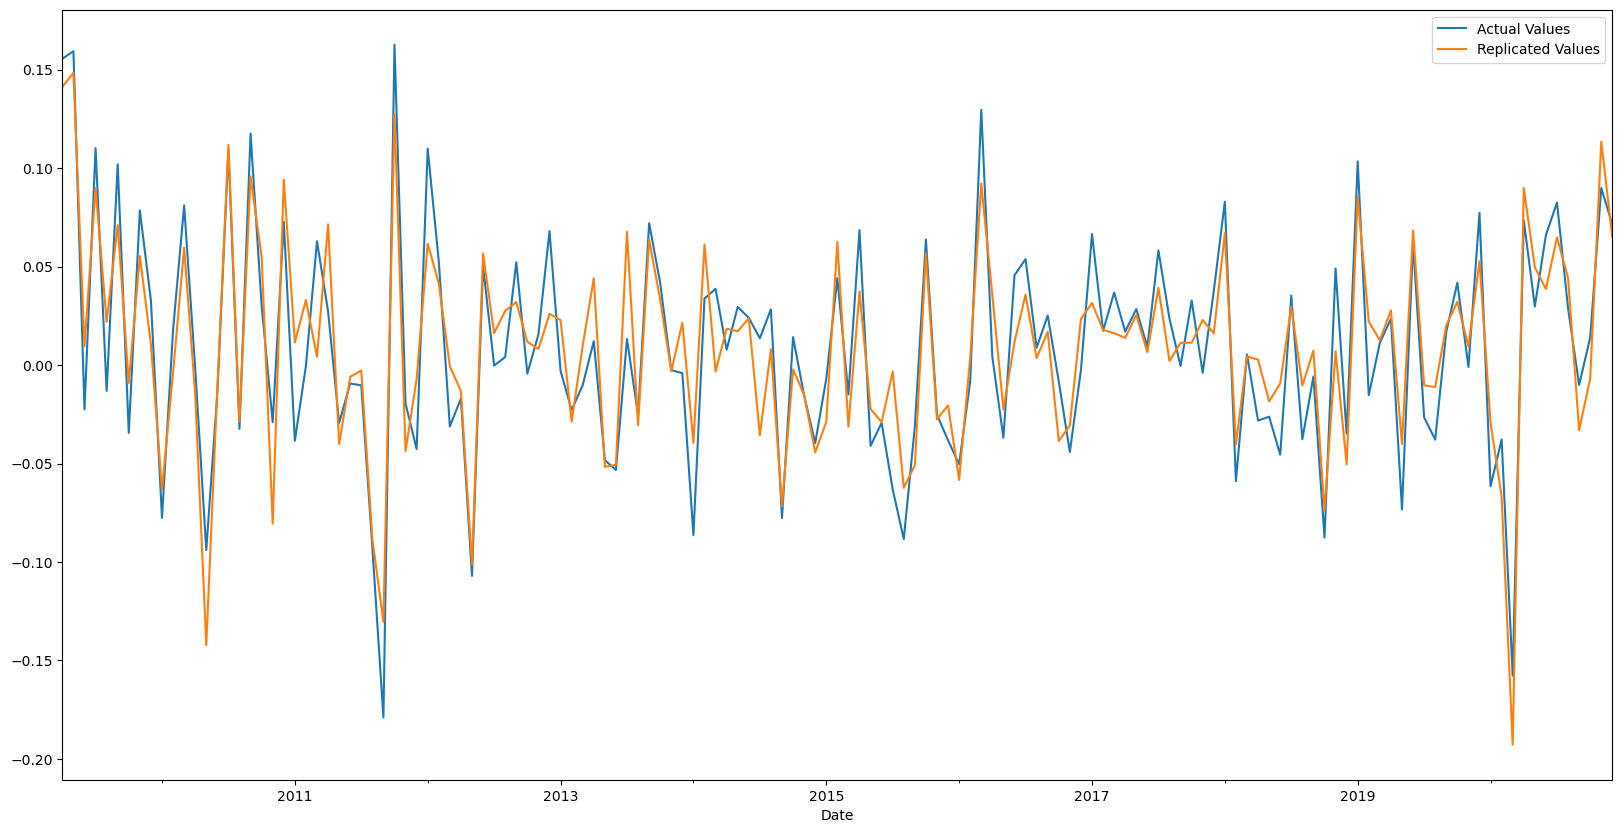

In [148]:
pd.concat([y, results.fittedvalues], axis = 1).rename(columns = {'EEM':'Actual Values', 0: 'Replicated Values'}).plot(figsize=(20,10))

In [173]:
# Question 2.3
combined_data = pd.merge(data_portfolio, data_returns, on = 'Date')
combined_data = combined_data.set_index('Date')
insample_data = combined_data.loc[:'2023'].reset_index(drop=True)
outsample_data = combined_data.loc['2024':].reset_index(drop=True)

y_train = insample_data['EEM']
x_train = insample_data.drop(columns = ['EEM'])
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit() 
results = model.summary() 
iis = pd.concat([y_train, model.predict(x_train)], axis = 1).rename(columns = {'EEM':'Actual Values', 0: 'Predicted Values'})
iis.corr().iloc[0,1]

0.8901854587504374

In [188]:
insample_betas = model.params
y_test = outsample_data['EEM']
x_test = outsample_data.drop(columns = 'EEM')
x_test = sm.add_constant(x_test)
oos_values = model.predict(x_test)
pd.concat([y_test, oos_values], axis = 1).rename(columns = {0:'Replicated OOS'})
oos_values

0   -0.045262
1    0.041678
2    0.027257
3   -0.002191
4    0.029519
dtype: float64

In [190]:
outsample_data

,portfolio,SPY,EFA,EEM,PSP,QAI,HYG,DBC,IYR,IEF,BWX,TIP,SHV
0,-0.015127,0.015926,-0.004512,-0.045262,-0.006270,-0.003987,0.001163,0.013158,-0.050979,0.000726,-0.030630,0.003349,0.003995
1,0.014520,0.052187,0.029863,0.041678,0.041903,0.015677,0.003035,-0.015226,0.021326,-0.020826,-0.010788,-0.010477,0.003933
2,0.018276,0.032702,0.033786,0.027257,0.032782,0.014450,0.010898,0.044566,0.018538,0.007332,0.003882,0.006466,0.004161
3,-0.041315,-0.040320,-0.032432,-0.002191,-0.040782,-0.011978,-0.013513,0.016108,-0.081201,-0.031298,-0.036210,-0.016908,0.003744
4,0.022430,0.041097,0.040637,0.029519,0.034930,0.012451,0.012782,0.001714,0.029056,0.013285,0.012824,0.013764,0.004218


## HW1.x: Assessing the OLS Model


<Axes: >

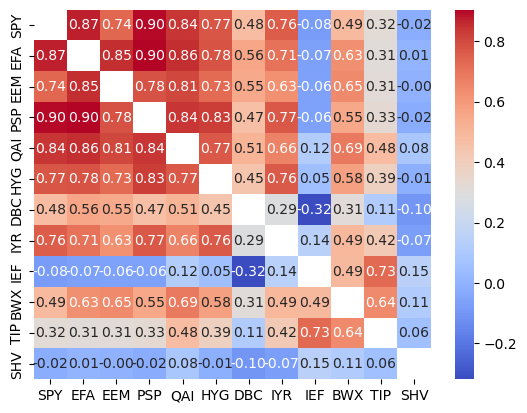

In [192]:
#Question1  
import seaborn as sns 
data_info = pd.read_excel('./../data/multi_asset_etf_data.xlsx')
data_returns = pd.read_excel('./../data/multi_asset_etf_data.xlsx', sheet_name='total returns')
data_returns = data_returns.set_index('Date')
corr_mtx = data_returns.corr()
np.fill_diagonal(corr_mtx.values, np.nan)
sns.heatmap(corr_mtx, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)


In [194]:
max_corr = corr_mtx.max().max()
max_corr_idx = corr_mtx.stack().idxmax()

min_corr = corr_mtx.min().min()
min_corr_idx = corr_mtx.stack().idxmin()
max_corr_idx, min_corr_idx

(('EFA', 'PSP'), ('DBC', 'IEF'))

In [196]:
# Question 2 
y = data_returns['PSP']
x = data_returns.drop(columns = ['PSP'])
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    PSP   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              137.3
Date:                Mon, 26 Aug 2024   Prob (F-statistic):                    9.01e-79
Time:                        20:37:23   Log-Likelihood:                          443.38
No. Observations:                 182   AIC:                                     -864.8
Df Residuals:                     171   BIC:                                     -829.5
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SPY            0.3481      0.100      3.474      0.001       0.150       0.546
EFA            0.5704      0.100      5.687      0.000       0.372       0.768
EEM           -0.0221      0.063     -0.348      0.728      -0.147       0.103
QAI            0.6426      0.283      2.274      0.024       0.085       1.200
HYG            0.4665      0.122      3.832      0.000       0.226       0.707
DBC           -0.1208      0.046     -2.630      0.009      -0.211      -0.030
IYR            0.1229      0.055      2.234      0.027       0.014       0.231
IEF           -0.4137      0.191     -2.167      0.032      -0.791      -0.037
BWX           -0.0138      0.131     -0.106      0.916      -0.272       0.245
TIP            0.2153      0.210      1.026      0.307      -0.199       0.630
SHV           -1.2698      1.098     -1.156      0.249      -3.437       0.898
==============================================================================
Omnibus:                        4.790   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                5.828
Skew:                          -0.151   Prob(JB):                       0.0543
Kurtosis:                       3.823   Cond. No.                         69.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Date'>

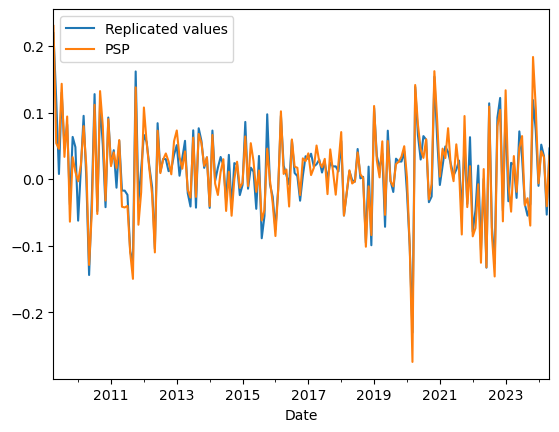

In [202]:
rets_replicated = pd.concat([((model.params)*x).sum(axis=1), y], axis = 1).rename(columns = {0:'Replicated values'})
rets_replicated.plot()

<Axes: xlabel='Date'>

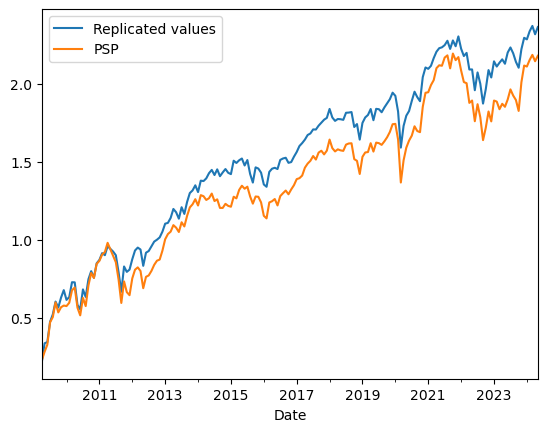

In [204]:
rets_replicated.cumsum().plot()

In [207]:
# Question $ 

import numpy as np 
np.linalg.cond(x.T@x), np.linalg.det(x.T@x)

(4775.532417793677, 4.732100103650244e-16)

In [223]:
# Question 2 

data = pd.read_excel('./../data/spy_rate_data.xlsx')
data = data.rename(columns = {data.columns[0]: 'Date'})
data = data.set_index(data.columns[0])
x = sm.add_constant(data[['10-yr Yields', 'Dvd-Price Ratio']])
y = data['SPY US Equity']
model = sm.OLS(y,x).fit()
results = model.summary() 
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SPY US Equity   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     4.465
Date:                Mon, 26 Aug 2024   Prob (F-statistic):             0.0125
Time:                        20:43:06   Log-Likelihood:                 423.48
No. Observations:                 239   AIC:                            -841.0
Df Residuals:                     236   BIC:                            -830.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0741      0.023      3.191      0.002       0.028       0.120
10-yr Yields       -0.7707      0.280     -2.754      0.006      -1.322      -0.219
Dvd-Price Ratio    -2.2646      0.849     -2.669      0.008      -3.936      -0.593
==============================================================================
Omnibus:                        6.566   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                6.427
Skew:                          -0.333   Prob(JB):                       0.0402
Kurtosis:                       3.448   Cond. No.                         325.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All the results except for the alpha intercept term are statistically insigifnicant. The p value > 0.05 and thus null hypothesis is not rejected. 

In [234]:
# Question 3 

residuals = model.resid
lagged_residuals = residuals.shift(1) 
residuals.corr(lagged_residuals)*100

5.089259162593061

Means that the error terms and the previous error terms exhibit some orm of correlation where the influence of the past may affect the future, distorting the OLS estimation

In [240]:
# Question 4 

error = model.resid 
x = sm.add_constant(data[['10-yr Yields', 'Dvd-Price Ratio']])
model = sm.OLS(error**2, x).fit() 
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     8.172
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           0.000370
Time:                        20:47:12   Log-Likelihood:                 1087.1
No. Observations:                 239   AIC:                            -2168.
Df Residuals:                     236   BIC:                            -2158.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0041      0.001     -2.840      0.005      -0.007      -0.001
10-yr Yields        0.0586      0.017      3.367      0.001       0.024       0.093
Dvd-Price Ratio     0.2053      0.053      3.887      0.000       0.101       0.309
==============================================================================
Omnibus:                      150.121   Durbin-Watson:                   1.572
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1029.503
Skew:                           2.511   Prob(JB):                    2.79e-224
Kurtosis:                      11.841   Cond. No.                         325.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By regressing the sample residuals, we are able to observe if the residual variance is constant and thus homoskedastic. Therefore, if the betas are signficant in the regression results, this means that the residuals exhibit heteroskedasticity. 